# 스칼라, 벡터, 메트릭스, 텐서

- 단일 값은 Scalar
- 1D(1차원) 데이터는 Vector
- 2D(행렬) 데이터는 Matrix
- 3차원 이상의 데이터는 Tensor

- torch.Tensor는 단일 데이터 타입(single data type)을 가집니다.
- torch.Tensor 간의 연산은 같은 데이터타입일 경우에만 가능합니다.
- Numpy의 배열 연산으로 수행할 수 있는 내용도, GPU를 활용하여 빠르게 학습하려는 경우 torch.Tensor로 변환할 수 있습니다.

In [1]:
import torch
import numpy as np

In [2]:
print(torch.__version__)

2.3.0+cu121


In [3]:
arr = np.array([1, 3, 5, 7, 9])
print(arr)
print(arr.dtype)
print(type(arr))

[1 3 5 7 9]
int64
<class 'numpy.ndarray'>


Numpy로부터 Tensor 변환

## torch.from_numpy() - sharing

In [4]:
t1 = torch.from_numpy(arr)
print(t1) # 출력
print(t1.dtype)  # dtype은 데이터 타입
print(t1.type()) # type()은 텐서의 타입
print(type(t1))  # t1 변수 자체의 타입

tensor([1, 3, 5, 7, 9])
torch.int64
torch.LongTensor
<class 'torch.Tensor'>


## torch.as_tensor() - sharing

In [5]:
t2 = torch.as_tensor(arr)
print(t2) # 출력
print(t2.dtype)  # dtype은 데이터 타입
print(t2.type()) # type()은 텐서의 타입
print(type(t2))  # t2 변수 자체의 타입

tensor([1, 3, 5, 7, 9])
torch.int64
torch.LongTensor
<class 'torch.Tensor'>


In [6]:
# t1, t2 출력
print(f't1: {t1}')
print(f't2: {t2}')

t1: tensor([1, 3, 5, 7, 9])
t2: tensor([1, 3, 5, 7, 9])


## torch.tensor() - copying

In [7]:
t3 = torch.tensor(arr)
print(t3) # 출력
print(t3.dtype)  # dtype은 데이터 타입
print(t3.type()) # type()은 텐서의 타입
print(type(t3))  # t3 변수 자체의 타입

tensor([1, 3, 5, 7, 9])
torch.int64
torch.LongTensor
<class 'torch.Tensor'>


In [8]:
arr[0] = 999

print(f't1: {t1}')
print(f't2: {t2}')
print(f't3: {t3}')

t1: tensor([999,   3,   5,   7,   9])
t2: tensor([999,   3,   5,   7,   9])
t3: tensor([1, 3, 5, 7, 9])


torch.tensor()로 numpy array를 변환시 sharing이 아닌 copying하기 때문에 원본 numpy array의 요소가 변하더라고 tensor에 영향을 끼치지 않음을 확인할 수 있습니다.

## torch.zeros()

In [9]:
zeros = torch.zeros(3, 5, dtype=torch.int32)
print(zeros)
print(zeros.dtype)
print(zeros.type())

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)
torch.int32
torch.IntTensor


## torch.arange(start, end, step)

지정된 범위로 tensor를 생성합니다.

In [10]:
# end만 지정
a = torch.arange(5)
print(a)
# start, end 지정
a = torch.arange(2, 6)
print(a)
# start, end, step 모두 지정
a = torch.arange(1, 10, 2)
print(a)

tensor([0, 1, 2, 3, 4])
tensor([2, 3, 4, 5])
tensor([1, 3, 5, 7, 9])


## torch.linspace(start, end, steps)

start부터 end까지 동일 간격으로 생성합니다. steps 지정시 steps 갯수만큼 생성합니다.

In [15]:
# start, stop, step 모두 지정
b = torch.linspace(2, 10, 5)
print(b)

tensor([ 2.,  4.,  6.,  8., 10.])


## tensor의 타입 변경: type()

In [16]:
aa = torch.arange(10, dtype=torch.int32)
print(aa)
print(aa.type())

print('==='*10)
# tensor의 타입 변경
bb = aa.type(torch.int64)
print(bb)
print(bb.type())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=torch.int32)
torch.IntTensor
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.LongTensor


## 랜덤 tensor 생성



- torch.rand(): [0, 1) 분포 안에서 랜덤한 tensor를 생성합니다.
- torch.randn(): standard normal 분포 안에서 랜덤한 tensor를 생성합니다.
- torch.randint(): 정수로 채워진 랜덤한 tensor를 생성합니다.

In [17]:
# random 생성 범위: 0 ~ 1
rd1 = torch.rand(2, 3)
print(rd1)

tensor([[0.3098, 0.4818, 0.1929],
        [0.6920, 0.4215, 0.2147]])


In [18]:
# random 생성 범위: standard normal
rd2 = torch.randn(2, 3)
print(rd2)

tensor([[-0.5134,  1.1349,  1.9862],
        [-1.7069, -0.0399,  0.4293]])


In [19]:
# randint 생성시 low, high, size를 지정한 경우
rd3 = torch.randint(low=1, high=10, size=(2, 3))
print(rd3)

tensor([[4, 1, 9],
        [5, 2, 3]])


torch.manual_seed(): 난수 생성시 시드의 고정

In [20]:
# manual_seed를 고정시 고정한 cell의 난수 생성은 매번 동일한 값을 생성
torch.manual_seed(0)
rd4 = torch.randint(low=1, high=100, size=(2, 3))
print(rd4)

tensor([[99, 19, 57],
        [70, 53, 70]])


## like로 tensor 생성

_like()가 붙은 이름의 함수는 _like() 안에 넣어주는 tensor의 shape와 동일한 tensor를 생성합니다.

In [21]:
x = torch.tensor([[1, 3, 5],
                  [7, 9, 11]], dtype=torch.float32)
print(x)
print(x.type())

tensor([[ 1.,  3.,  5.],
        [ 7.,  9., 11.]])
torch.FloatTensor


In [22]:
# [0, 1)
like1 = torch.rand_like(x)
print(like1)
print(like1.type())

tensor([[0.4901, 0.8964, 0.4556],
        [0.6323, 0.3489, 0.4017]])
torch.FloatTensor


In [23]:
# standard normal
like2 = torch.randn_like(x)
print(like2)
print(like2.type())

tensor([[ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])
torch.FloatTensor


In [24]:
# int range
like3 = torch.randint_like(x, low=1, high=100)
print(like3)
print(like3.type())

tensor([[90., 24., 98.],
        [99., 43., 10.]])
torch.FloatTensor


## tensor의 shape 확인 및 변경

In [25]:
print(x.shape)
print(x.shape[0])
print(x.shape[1])

torch.Size([2, 3])
2
3


In [26]:
print(x)
# view()로 shape 변경
print(x.view(3, 2))

tensor([[ 1.,  3.,  5.],
        [ 7.,  9., 11.]])
tensor([[ 1.,  3.],
        [ 5.,  7.],
        [ 9., 11.]])


In [27]:
# reshape
x.reshape(-1, 1)

tensor([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.]])

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터셋 생성

In [33]:
x = torch.tensor(np.arange(10))
y = 2*x + 1
y

tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

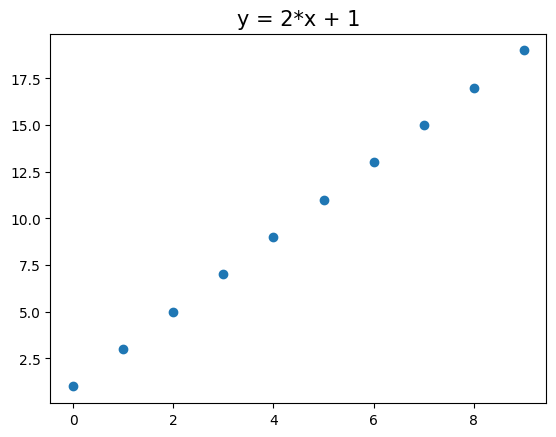

In [35]:
plt.title('y = 2*x + 1', fontsize=15)
plt.scatter(x, y)
plt.show()

In [36]:
# random w, b 생성
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
w, b

(tensor([0.4087], requires_grad=True), tensor([1.4214], requires_grad=True))

In [37]:
# Hypothesis Function 정의
y_hat = w*x + b

In [38]:
# Mean Squared Error(MSE) 오차 정의
loss = ((y_hat - y)**2).mean()

# BackPropagation (Gradient 계산)
loss.backward()

In [39]:
# 결과 출력
print(f'w gradient: {w.grad.item():.2f}, b gradient: {b.grad.item():.2f}')

w gradient: -86.91, b gradient: -13.48


## w, b 의 직접 계산한 Gradient와 비교

In [40]:
w_grad = (2*(y_hat - y)*x).mean().item()
b_grad = (2*(y_hat - y)).mean().item()

In [41]:
print(f'w gradient: {w_grad:.2f}, b gradient: {b_grad:.2f}')

w gradient: -86.91, b gradient: -13.48


## Gradient 계산 미적용

In [42]:
y_hat = w*x + b
print(y_hat.requires_grad)

with torch.no_grad():
    y_hat = w*x + b

print(y_hat.requires_grad)

True
False


# PyTorch로 경사하강법(Gradient Descent) 구현

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

비용 함수 (Cost Function 혹은 Loss Function)를 최소화하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [43]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

## 샘플 데이터셋 생성

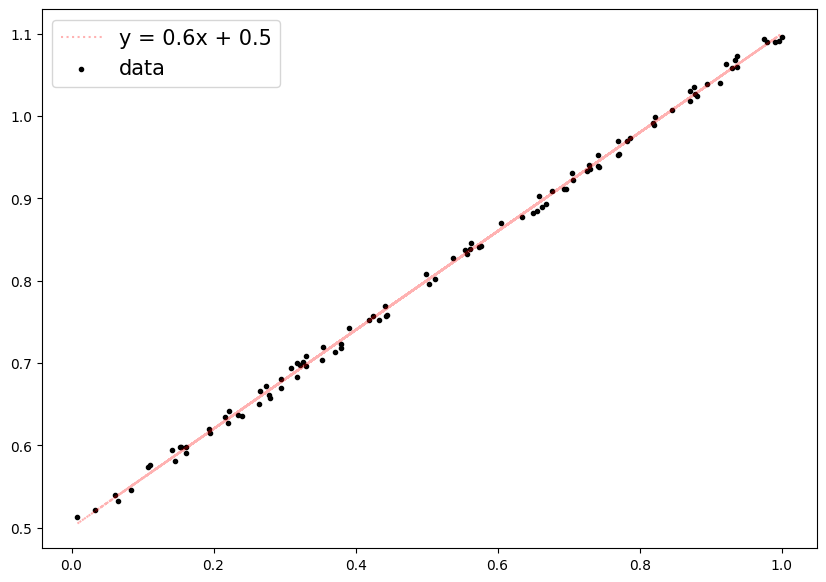

w: 0.6, b: 0.5


In [45]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}', linestyle=':', alpha=0.3)
    plt.scatter(x, yy, color='black', label='data', marker='.')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.6, b=0.5, size=100, noise=0.01)

In [46]:
# 샘플 데이터셋을 텐서(tensor)로 변환
x = torch.as_tensor(x)
y = torch.as_tensor(y)

In [47]:
# random 한 값으로 w, b를 초기화 합니다.
w = torch.rand(1)
b = torch.rand(1)

print(w.shape, b.shape)

# requires_grad = True로 설정된 텐서에 대해서만 미분을 계산합니다.
w.requires_grad = True
b.requires_grad = True

torch.Size([1]) torch.Size([1])


In [48]:
# Hypothesis Function 정의 : 가설함수. 예측함수
y_hat = w * x + b

In [49]:
# 손실함수 정의
loss = ((y_hat - y)**2).mean()

# 미분 계산 (Back Propagation)
loss.backward()

# 계산된 미분 값 확인
w.grad, b.grad

(tensor([0.3438]), tensor([0.6144]))

## 경사하강법 구현

In [50]:
# 최대 반복 횟수 정의
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 0.1

In [51]:
# loss, w, b 기록하기 위한 list 정의
losses = []
ws = []
bs = []

# random 한 값으로 w, b를 초기화 합니다.
w = torch.rand(1)
b = torch.rand(1)

# 미분 값을 구하기 위하여 requires_grad는 True로 설정
w.requires_grad = True
b.requires_grad = True

for epoch in range(num_epoch):
    # Affine Function
    y_hat = x * w + b

    # 손실(loss) 계산
    loss = ((y_hat - y)**2).mean()

    # 손실이 0.00005보다 작으면 break 합니다.
    if loss < 0.00005:
        break

    # w, b의 미분 값인 grad 확인시 다음 미분 계산 값은 None이 return 됩니다.
    # 이러한 현상을 방지하기 위하여 retain_grad()를 loss.backward() 이전에 호출해 줍니다.
    w.retain_grad()
    b.retain_grad()

    # 미분 계산
    loss.backward()

    # 경사하강법 계산 및 적용
    # w에 learning_rate * (그라디언트 w) 를 차감합니다.
    w = w - learning_rate * w.grad
    # b에 learning_rate * (그라디언트 b) 를 차감합니다.
    b = b - learning_rate * b.grad

    # 계산된 loss, w, b를 저장합니다.
    losses.append(loss.item())
    ws.append(w.item())
    bs.append(b.item())

    if epoch % 5 == 0:
        print("{0:03d} w = {1:.5f}, b = {2:.5f} loss = {3:.5f}".format(epoch, w.item(), b.item(), loss.item()))

print("----" * 15)
print("{0:03d} w = {1:.1f}, b = {2:.1f} loss = {3:.5f}".format(epoch, w.item(), b.item(), loss.item()))

000 w = 0.55862, b = 0.30272 loss = 0.08767
005 w = 0.62863, b = 0.43479 loss = 0.00459
010 w = 0.64195, b = 0.46552 loss = 0.00044
015 w = 0.64277, b = 0.47358 loss = 0.00022
020 w = 0.64092, b = 0.47651 loss = 0.00019
025 w = 0.63861, b = 0.47824 loss = 0.00017
030 w = 0.63630, b = 0.47963 loss = 0.00015
035 w = 0.63410, b = 0.48089 loss = 0.00014
040 w = 0.63202, b = 0.48206 loss = 0.00013
045 w = 0.63007, b = 0.48316 loss = 0.00012
050 w = 0.62823, b = 0.48419 loss = 0.00011
055 w = 0.62650, b = 0.48516 loss = 0.00010
060 w = 0.62488, b = 0.48608 loss = 0.00010
065 w = 0.62335, b = 0.48694 loss = 0.00009
070 w = 0.62191, b = 0.48774 loss = 0.00008
075 w = 0.62055, b = 0.48850 loss = 0.00008
080 w = 0.61928, b = 0.48922 loss = 0.00007
085 w = 0.61808, b = 0.48989 loss = 0.00007
090 w = 0.61696, b = 0.49053 loss = 0.00007
095 w = 0.61590, b = 0.49112 loss = 0.00006
100 w = 0.61490, b = 0.49168 loss = 0.00006
105 w = 0.61396, b = 0.49221 loss = 0.00006
110 w = 0.61308, b = 0.49270 los

## 결과 시각화

- loss는 epoch이 늘어남에 따라 감소합니다.
- epoch 초기에는 급격히 감소하다가, 점차 완만하게 감소함을 확인할 수 있는데, 이는 초기에는 큰 미분 값이 업데이트 되지만, 점차 계산된 미분 값이 작아지게되고 결국 업데이트가 작게 일어나면서 손실은 완만하게 감소하였습니다.
- w, b도 초기값은 0.3, 0.5와 다소 먼 값이 설정되었지만, 점차 정답을 찾아가게 됩니다.

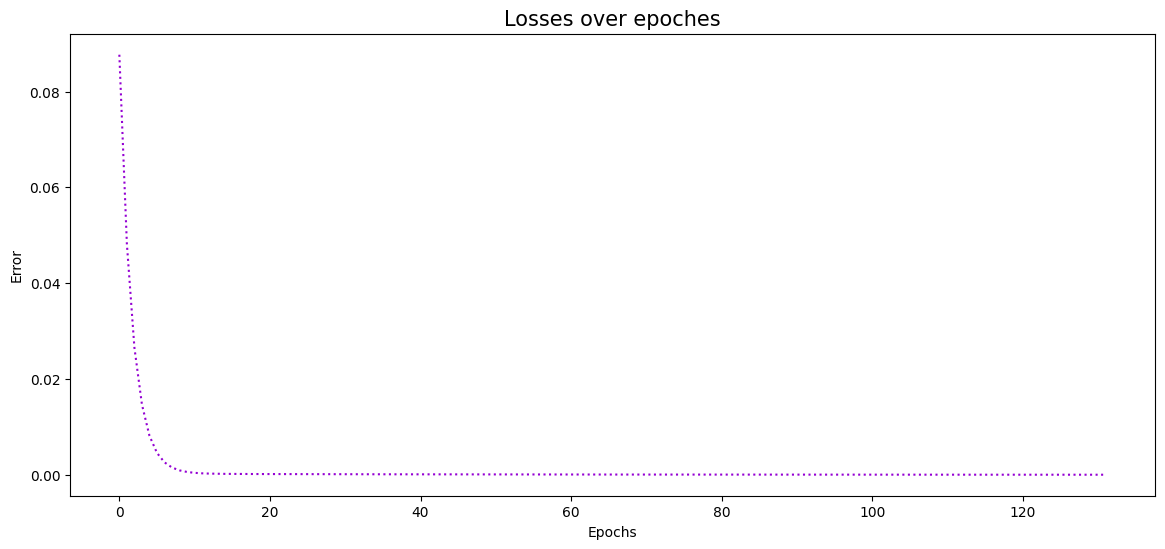

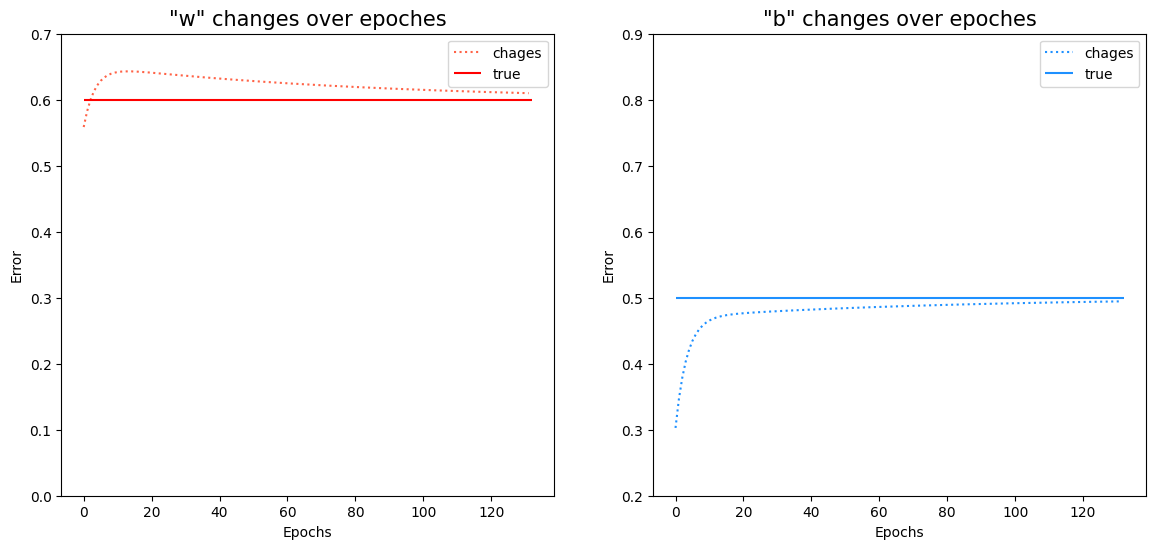

In [53]:
# 전체 loss 에 대한 변화량 시각화
plt.figure(figsize=(14, 6))
plt.plot(losses, c='darkviolet', linestyle=':')

plt.title('Losses over epoches', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# w, b에 대한 변화량 시각화
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(14, 6)

axes[0].plot(ws, c='tomato', linestyle=':', label='chages')
axes[0].hlines(y=0.6, xmin=0, xmax=len(ws), color='r', label='true')
axes[0].set_ylim(0, 0.7)
axes[0].set_title('"w" changes over epoches', fontsize=15)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Error')
axes[0].legend()

axes[1].plot(bs, c='dodgerblue', linestyle=':', label='chages')
axes[1].hlines(y=0.5, xmin=0, xmax=len(ws), color='dodgerblue', label='true')
axes[1].set_ylim(0.2, 0.9)
axes[1].set_title('"b" changes over epoches', fontsize=15)
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Error')
axes[1].legend()

plt.show()